In [1]:
import os

# Obtenir le répertoire de travail actuel
project_directory = os.getcwd()

print("Répertoire du projet : ", project_directory)

# on'a pose la problematik on verra comment arriver a un modele et apres on verra comment le deployer

#on va travailler avec la BD de train et pas de test pour le moment

Répertoire du projet :  C:\Users\DAVID TANKEU\Credit Logement Bancaire


In [95]:
# importation des packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix # celle ci permet d'evaluer notre modele
import pickle  # ce package est utilise pour stoker notre modele


In [81]:
#je vais donc importer ma base de donne
# explikez chak colone dans sa video
#selfemploye(eskil a son propre business)
#ApplicantIncome(salaire de selui ki demande de credit)
#CoapplicantIncome(partenaire de celui i demande le credit femme ou mari)
#LoanAmount(montant de credit demande)
#Loan_Amount_Term(nombre de mois pour le credit)
#Credit_History(historique du crdit)
#Property_Area(ou la personne vit si cen urban ou en rural)
data_frame_credit = pd.read_csv('D:\\MES FICHIERS\\BD Credit Logement\\train.csv')
data_frame_credit

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [9]:
#realisons une copy de notre bd cela permit de faire une copie et de relaiser notre travail sur l'autre BD

# ca nous permet egalement d'avoir 2 BD une BD originale et une BD nettoye

df_credit_copy = data_frame_credit.copy()
df_credit_copy

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [10]:
#examinons le type de colone de notre BD
#ici on voit ke Gender est de type Object, loanAmount est de type float

# et savoir que Object est de type categorique donc il faut toujours faire cette verification

# si par exemple je trouve pour le salaire que c de type object c par correct car le salaire doit etre de type entier ou reel

#apres examin on trouve que le type de colonne est bon
data_frame_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#voyons la taille de notre BD

#ici la BD contit 13 colone et 614 lignes

data_frame_credit.shape

(614, 13)

In [12]:
#verifions maintenant les valeurs manquantes

# ici on voit que dans Gender on'a 13 valeurs manquantes ce qui n'est pas enorme par rapport a 614
#Married on'a 3 valeurs manquantes ce n'est pas enorme par rapport a 614
#loanAmount on'a 22 valeurs manquantes ce n'est pas enorme par rapport a 614

# si on trouve peut etre une colone avec 300 valeurs manquantes on verra comment la supprimer

data_frame_credit.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#pour supprimer les valeurs manquantes on doit:
#pour les variables categoriques on va les remplacer par le mode
#pour les variables numeriques on va les remplacer par la mediane

# je vous ferai un cours sur les statistiques a utilise en data scientist

# avant de faire ca je dois connaitre les variables numerique et les variables categoriques pour les connaitre

data_frame_credit.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
# pour le fairer je vais donc creer deux liste
# je ne vais pas travailler avec Loan_ID car ca represente le numero de dossier de chak client

variables_numeriques = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
variables_categoriques = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Status','Property_Area' ]

print('Les variables numeriques sont:',variables_numeriques)
print('Les variables categoriques sont:',variables_categoriques)

Les variables numeriques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Les variables categoriques sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status', 'Property_Area']


In [ ]:
#la methode fillna permet de remplir les valuers manquantes

In [19]:
#supprimon les valeurs manquantes cote variables categoriques
# im=nplace = true car on veut faire ce remplacement dans la memoire dans la BD car si on ne met pas ce inplace il va 
# bien afficher la valeur manquante renseigne mais il ne l'enregistrera pas dans la BD

# la on met [0] car il y'a les cas ou on peut avoir deux modes

data_frame_credit['Gender'].fillna(data_frame_credit['Gender'].mode()[0],inplace=True)
data_frame_credit['Self_Employed'].fillna(data_frame_credit['Self_Employed'].mode()[0],inplace=True)
data_frame_credit['Married'].fillna(data_frame_credit['Married'].mode()[0],inplace=True)
data_frame_credit['Dependents'].fillna(data_frame_credit['Dependents'].mode()[0],inplace=True)
data_frame_credit['Credit_History'].fillna(data_frame_credit['Credit_History'].mode()[0],inplace=True)

# ici je veux remplacer les valeurs manquantes dans la colone Gender par le mode de la colone Gender
# donc la on prendra uniquement la 1ere valeur



In [15]:
#je vous montre pkoi j'ai pris l'indice 0 donc la il prend uniquement Male

data_frame_credit['Gender'].mode()[0]

'Male'

In [20]:
#supprimon les valeurs manquantes cote variables numeriques
#la on ne mettra plus [O] car on'a une seule mediane
#inplace=True es tjr pour remplacer dans la BD

#les valeurs manquantes sont remlaces par la mediane

data_frame_credit['LoanAmount'].fillna(data_frame_credit['LoanAmount'].median(),inplace=True)
data_frame_credit['Loan_Amount_Term'].fillna(data_frame_credit['Loan_Amount_Term'].median(),inplace=True)

In [21]:
#verifions maintenant si on'a encore les valeurs manquantes dans notre BD

#la maintenant on voit kon'a plus de valeurs manquantes

data_frame_credit.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Passons a l'analyse Univariee on prendra Variable par Variable et on va les etudier

# ici on 'aura une variables Target ou encore variable de sortie  ou variables cible et ici ca sera Loan'status qu sera pour savoir si le credit a ete accorde ou pas

# donc Loarn status est une variable dependante car elle depend de toutes les autres variables et les autres variables de notre BD sont independantes

In [24]:
# voyons donc le nombre de credit valide et le nombre de credit non accorde dans notre variable target

# ici on voit kon 'a 422 credit accorde et 192 credit non accorde'

data_frame_credit['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [25]:
# essayons d'etudier notre variable univarie target de pret

# voyons cela en pourcentage

# normalize veut dire ke je met le tout entre 0 et 1 et je multiplie par 100 pour donner un pourcentage

# donc la on'a 68 pourcent de credit accorde et 31 pourcent de credit non accorde

data_frame_credit['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit accorde ou pas'}, xlabel='Loan_Status'>

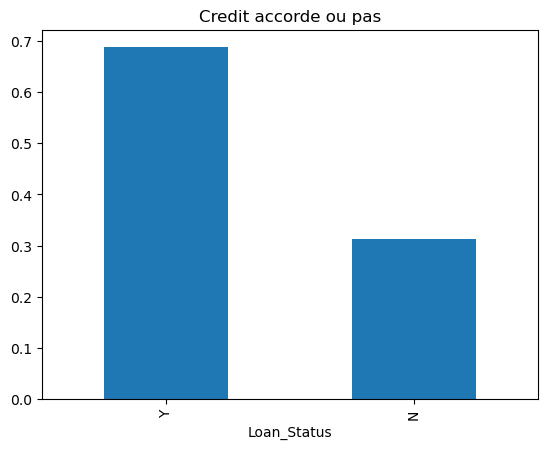

In [26]:
# essayons un peu de visulaiser notre variable target
data_frame_credit['Loan_Status'].value_counts(normalize=True).plot.bar(title='Credit accorde ou pas')

In [ ]:
#l'analyse univarie c'est variables par variables apres on fera l'analyse bivarrie pour preparer notre BD pour le modele de machine Learning

In [27]:
data_frame_credit['Gender'].value_counts()

# la on'a 502 hoes et 112 femmes

# si on'avait par exemple Male avec m minisucule il devrait egalement compter et les renvoyer bref il est sensible a la casse

# donc la on'a seulement deux valeurs soit Male soit Female

Gender
Male      502
Female    112
Name: count, dtype: int64

In [28]:
#voyons maintenant en terme de pourcentage
# donc la on'a 81 pourcent d'homme et 18 pourcent de femme donc les hommes ont plus tendance a demander un credit

data_frame_credit['Gender'].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'Comparaison des sexes'}, xlabel='Gender'>

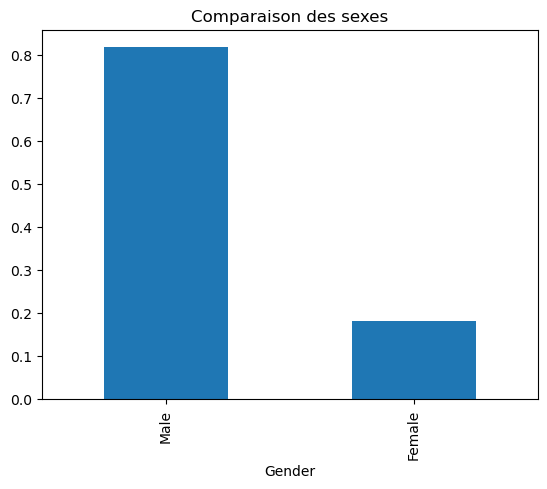

In [29]:
# faisons miantenant une visualisation au niveau des sexes

data_frame_credit['Gender'].value_counts(normalize=True).plot.bar(title='Comparaison des sexes')

In [ ]:
#il faut faire la meme chose pour toutes les autres variables categoriques Married etc...

In [30]:
#faisons le pour dependents
#on verra ke 58 pourcent ont 0 enfant
#16 ont 1 enfant
#16 ont 2 enfants
# 8 ont plus de 3 enfants

data_frame_credit['Dependents'].value_counts(normalize=True)*100

Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'Nombre Enfants'}, xlabel='Dependents'>

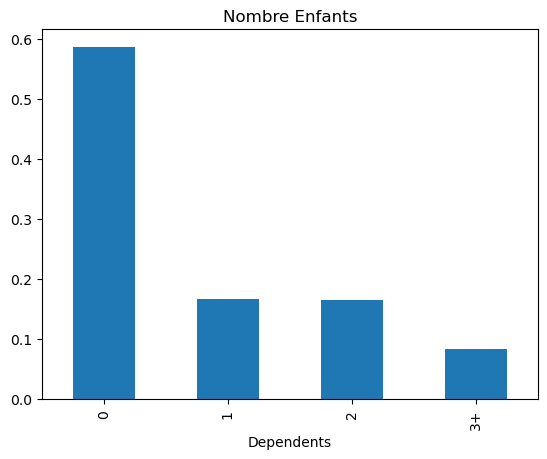

In [33]:
data_frame_credit['Dependents'].value_counts(normalize=True).plot.bar(title='Nombre Enfants')

In [35]:
#Les variables numeriques

#la a la 1ere colone on'a pas de valeurs manquantes
# la moyenne de ceux ki demande en ApplicantIncome est 5403.45 pour ceux ce loanAmount est de 145.75 etc...

# le salaire moyen de coapplicantincom est de 1621

# la moyenne de LoanAmount(Montant du credit) est 145 mil dollars et la valeur mediane est 128

#La methode describe() permettra kil m'affice plusieurs valeurs satisitsques

# le salaire minimun de la personne ki demande (ApplicantIncome) est de 81000 mil dollars
# le salaire maximal de la personne ki demande (ApplicantIncome) est de 150 mil dollars
# le salaire maximal du conjoint(CoapplicantIncome) de la personne ki demande (ApplicantIncome) est de 41667mil dollars
# le salaire minimal du conjoint(CoapplicantIncome) de la personne ki demande (ApplicantIncome) est de 0mil dollars


#il ya des valeurs aberantes mais on ne va pas les traiter dans ce probleme ci

data_frame_credit[variables_numeriques].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [ ]:
# essayon de visualiser les variables numeriques une par une

C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_2668\2988905251.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_credit['ApplicantIncome'])


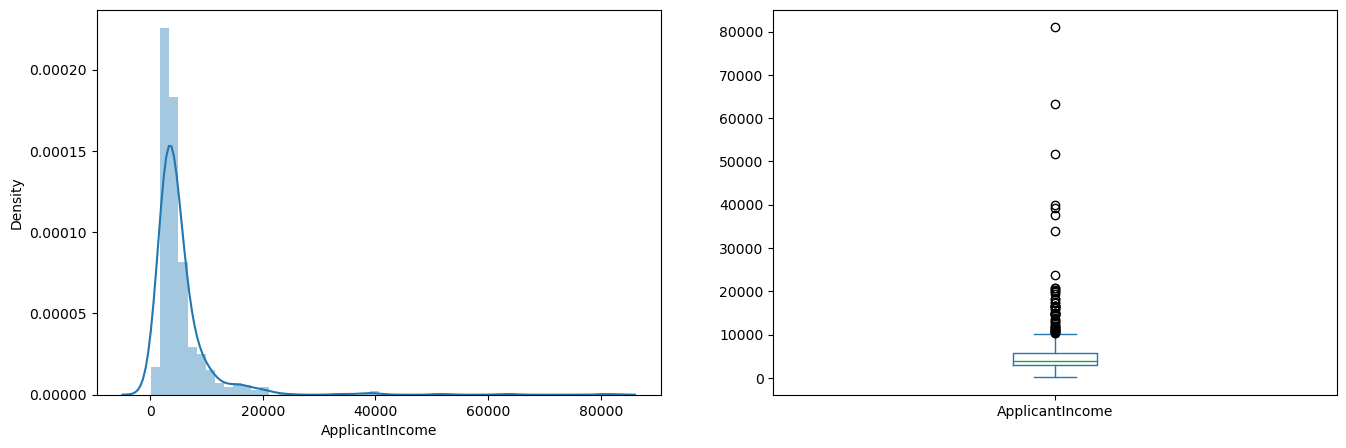

In [51]:
# on va faire deux digramme dans une figure un diagramme en moustache

#on'aura une figure une kon'a va diviser en deux sous figure subplot
#on va dessiner la premiere sous figure dans la position (121) et on va dessiner la deuxieme dans la position(122)

# dans la 1ere figure on mettra la distribution et dans la seconde on mettra les boxplot

# et dans la 2eme sous figure on dessinera e diagramme en moustache


plt.figure(1)  #ici je cree une figure


# 1ere sous figure

plt.subplot(121)
sns.distplot(data_frame_credit['ApplicantIncome'])

#2eme sous figure

plt.subplot(122)
data_frame_credit['ApplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()


In [ ]:
# pour le diagramme en moustache on voit kil ya beaucoup de valeurs aberantes( les rond ki forment la pluie) et le salaire tourne autour de

#3000 mil dollars ki represente la mediane

In [ ]:
# faire la meme chose pour coApplicantIncomme

C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_2668\2515086813.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_credit['CoapplicantIncome'])


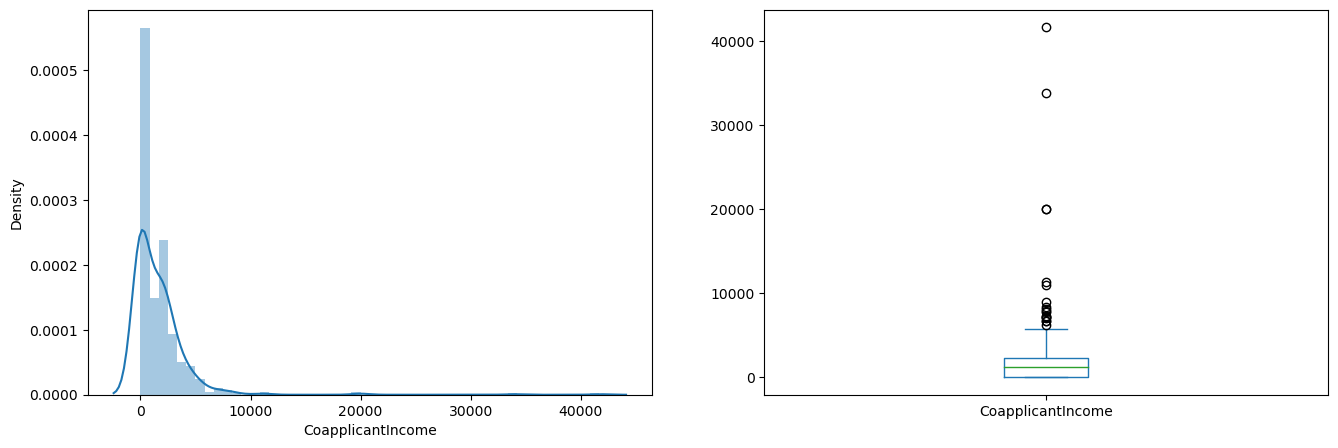

In [52]:
plt.figure(1)  #ici je cree une figure


# 1ere sous figure

plt.subplot(121)
sns.distplot(data_frame_credit['CoapplicantIncome'])

#2eme sous figure

plt.subplot(122)
data_frame_credit['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()

In [ ]:
#Faire la meme chose pour les autres variables numeriques

Analyse bivarrie

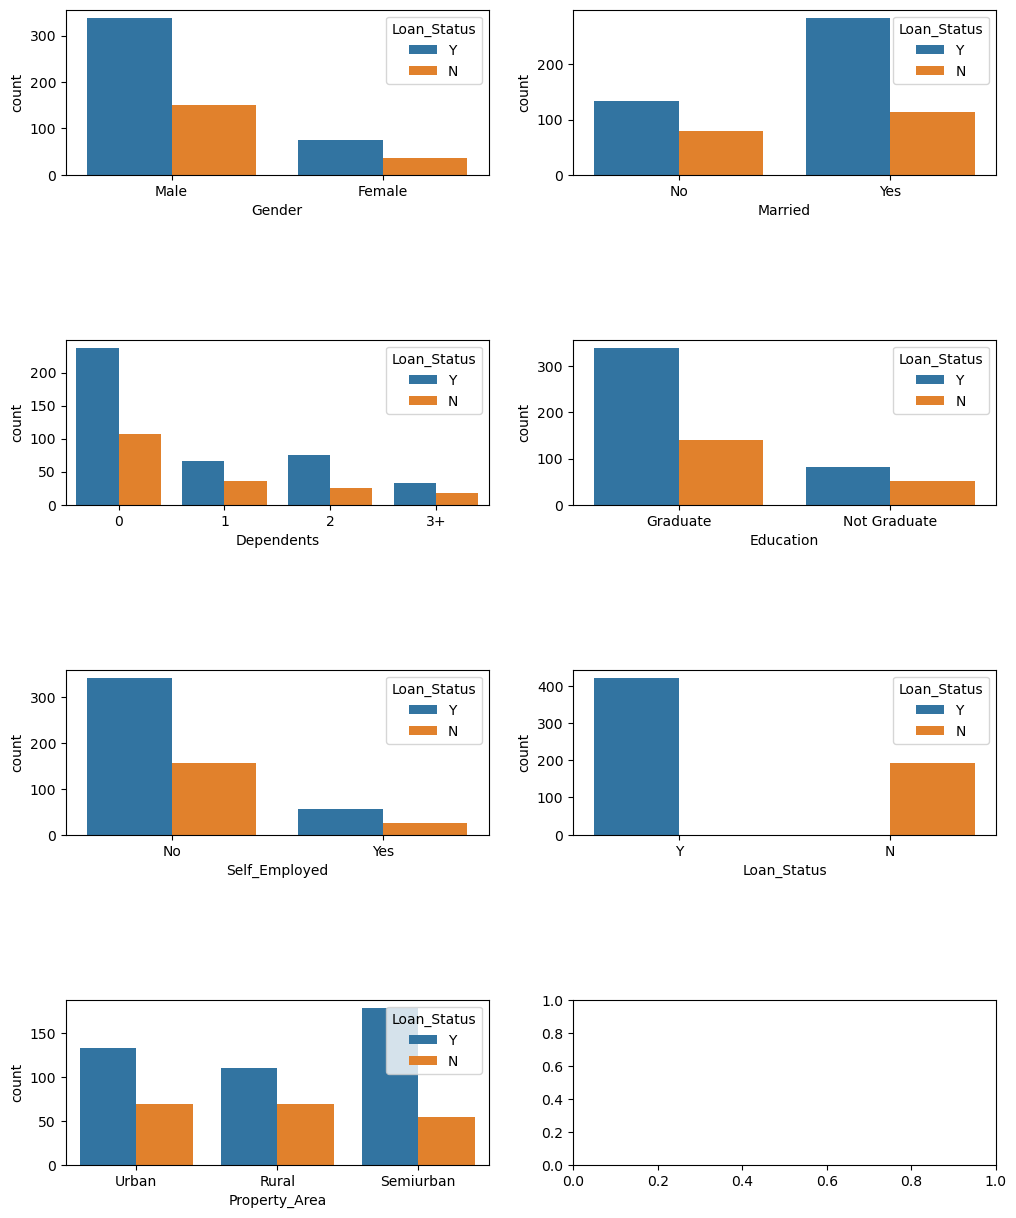

In [58]:
# pour l'analyse bivarrie je vais essayer de faire juste deux figures

# on'a 8 variables categories voila pkoi on'a divise en 4 colones et 2 lignes

# enumerate pour kil parcout le contenu de la position de la liste c'est un concept en python

fig,axes = plt.subplots(4,2, figsize=(12,15)) 

for idx,cat_col in enumerate(variables_categoriques):
    row,col = idx//2,idx%2
    sns.countplot(x = cat_col, data = data_frame_credit,hue='Loan_Status',ax = axes[row,col] )
plt.subplots_adjust(hspace=1)

In [ ]:
#on'est entrain d'etudier la relation entre chaque variable categorique et la variable load_status

#pour savoir peut etre si le sexe impact le status du credit ou pas
#ou bien essce que le mariage impact le statut du credit ou pas ainsi de suite pour les autres variables categoriques

In [53]:
for i, j in enumerate(variables_categoriques):
    print(i,j)

0 Gender
1 Married
2 Dependents
3 Education
4 Self_Employed
5 Loan_Status
6 Property_Area


Analyse bivarriees des variables Numeriques

pour le faire on peut faire une matrice de correlation ou ce kon appele la readmap
la readmap est un moyen pour avoir un visuel sur les valeurs numeriques

On va prendre les valeurs numeriques et on va les dessiner dans une readmap

In [64]:
#matrice de colleration pour voir la relation entre nos differentes variables numeriques

#annot = True car on veut voir les valeurs numeriques dans notre heatmap

matrix = data_frame_credit.corr()
f,ax=plt.subplots(figsize=(10, 12))
sns.heatmap(matrix , vmax = 0.8, square = True , cmap = 'BuPu' ,annot = True)
plt.show()

ValueError: could not convert string to float: 'LP001002'

In [61]:
#matrice de correlation entre les differentes variables numeriques
data_frame_credit.corr()

ValueError: could not convert string to float: 'LP001002'

Preaprons notre base de donnes pour faire notre algortihmes de machine learning pour faire la prevision

ce programme se concentra sur le package sckilearn qui est un package dedie aux algorithmes de machine learning

Creation du Modele mais avant de le faire preparons d'abord notre base de donnee

on va disviser notre BD en deux une base de donnees variables categoriques et l'autre variables numeriques

In [67]:
df_cat = data_frame_credit[variables_categoriques]
df_cat

Gender Married Dependents     Education Self_Employed Loan_Status  \
0      Male      No          0      Graduate            No           Y   
1      Male     Yes          1      Graduate            No           N   
2      Male     Yes          0      Graduate           Yes           Y   
3      Male     Yes          0  Not Graduate            No           Y   
4      Male      No          0      Graduate            No           Y   
..      ...     ...        ...           ...           ...         ...   
609  Female      No          0      Graduate            No           Y   
610    Male     Yes         3+      Graduate            No           Y   
611    Male     Yes          1      Graduate            No           Y   
612    Male     Yes          2      Graduate            No           Y   
613  Female      No          0      Graduate           Yes           N   

    Property_Area  
0           Urban  
1           Rural  
2           Urban  
3           Urban  
4           Urban  
..            ...  
609         Rural  
610         Rural  
611         Urban  
612         Urban  
613     Semiurban  

[614 rows x 7 columns]

In [ ]:
# toutes les chaines de caractere de cette BD remplacons les par les 0 et 1 pour pouvoir les utiliser dans notre modele

In [ ]:
# concatener veut dire mettre l'un a cote de l'autre

In [75]:
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat

Education  Gender  Loan_Status  Married  Property_Area  Self_Employed
0      False    True        False    False          False          False
1      False   False        False     True          False          False
2      False   False        False    False          False          False
3       True   False        False    False          False          False
4      False   False        False    False          False           True
5      False   False         True    False          False          False
6      False   False        False    False           True          False

Concatenons maintenant cette base de donnes avec la partie numerique

In [76]:
df_num = data_frame_credit[variables_numeriques]
df_num

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [77]:
nouvelle_base_donnee_concatene = pd.concat([df_cat,df_num], axis=1)
nouvelle_base_donnee_concatene

Education Gender Loan_Status Married Property_Area Self_Employed  \
0       False   True       False   False         False         False   
1       False  False       False    True         False         False   
2       False  False       False   False         False         False   
3        True  False       False   False         False         False   
4       False  False       False   False         False          True   
..        ...    ...         ...     ...           ...           ...   
609       NaN    NaN         NaN     NaN           NaN           NaN   
610       NaN    NaN         NaN     NaN           NaN           NaN   
611       NaN    NaN         NaN     NaN           NaN           NaN   
612       NaN    NaN         NaN     NaN           NaN           NaN   
613       NaN    NaN         NaN     NaN           NaN           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 11 columns]

il faut mettre notre variable target a part

In [78]:
y = nouvelle_base_donnee_concatene['Loan_Status']
y

0      False
1      False
2      False
3      False
4      False
       ...  
609      NaN
610      NaN
611      NaN
612      NaN
613      NaN
Name: Loan_Status, Length: 614, dtype: object

on va creer maintenant une varaible X qui va contenir les features ou les caracteristiques

pour cela supprimons d'abord la colone Load_Status

In [79]:
X = nouvelle_base_donnee_concatene.drop('Loan_Status',axis = 1)
X

Education Gender Married Property_Area Self_Employed  ApplicantIncome  \
0       False   True   False         False         False             5849   
1       False  False    True         False         False             4583   
2       False  False   False         False         False             3000   
3        True  False   False         False         False             2583   
4       False  False   False         False          True             6000   
..        ...    ...     ...           ...           ...              ...   
609       NaN    NaN     NaN           NaN           NaN             2900   
610       NaN    NaN     NaN           NaN           NaN             4106   
611       NaN    NaN     NaN           NaN           NaN             8072   
612       NaN    NaN     NaN           NaN           NaN             7583   
613       NaN    NaN     NaN           NaN           NaN             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  
0                  0.0         NaN             360.0             1.0  
1               1508.0       128.0             360.0             1.0  
2                  0.0        66.0             360.0             1.0  
3               2358.0       120.0             360.0             1.0  
4                  0.0       141.0             360.0             1.0  
..                 ...         ...               ...             ...  
609                0.0        71.0             360.0             1.0  
610                0.0        40.0             180.0             1.0  
611              240.0       253.0             360.0             1.0  
612                0.0       187.0             360.0             1.0  
613                0.0       133.0             360.0             0.0  

[614 rows x 10 columns]

Maintenant que nos donnes sont pretes on va importer ce quon va utiliser pour le modele

La variables de sortie est une variable categorique c'est Yes ou NO bon la on pense generalement a la regression logistique il y'a d'autres algorithmes
ici par exemple random Forest peut aussi etre adequant mais ici on va se concentrer sur un seul algortihmes qui est LogisticRegression


il faut diviser notre BD en deux une partie test qui prend 20 pourcent et une partie entrainement qui prend 80 pourcent

In [82]:
#random_state pour que ca se fasse d'une facon aleatoire

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 6)

Instacions maintenant le modele

In [86]:
#creons un classificateur clf
#Instacier le modele
clf = LogisticRegression()

#entrainer le modele
clf.fit(x_train,y_train)  # fit pour dire kon va l'appliquer a xtrain et ytrain

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

UTILISONS MAINTENANT CE MODELE POUR FAIRE DES PREVISIONS

In [ ]:
#Testons le modele avec les variables tests

pred = clf.predict(x_test)

In [87]:
pred  # les valeurs qu'on aura ici seront des valeurs calculees a base de notre modele

NameError: name 'pred' is not defined

Comparons le avec le y_test qui sont les bonnes valeurs de la base de donnee x_test c les valeurs predictes

y_test sont les bonnes valeurs extraites de la base de donnee

pour comparer donc les valeurs predites par notre model et les bonnes valeurs de la BD on va utliser accuracy_score

In [ ]:
accuracy_score(y_test,pred)

# on verra que le modele est precis a 83 pourcent

In [88]:
X.columns

Index(['Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

il ya d'autres techniques il y'a des colones qui ont un impact et d'autres ki n'en n'ont pas donc on
peut supprimer d'autres colones et voir comment evolue notre precision

il faut de meme normaliser la Base de donne la mettre entre 1 et 0 il y'a des focntions pour le faire ca va nous aider pour ameliorer notre accurrracy

In [ ]:
# faisons nos propres previsions en utilisant notre modele cela permet de voir si on'a un nouveau client si on lui donnera un credit ou pas

#pour cela choississons un profil_test

# si en sortie on'a 1 ca veut dire que le credit sera accorde et 0 le credit ne sera pas accorde

profil_test = [[1,1,1,1,1,0,1,100,200,300]]
clf.predict(profil_test)

on va donc essayer d'implementer ce modele dans notre web application

Enregistrons le modele pour pouvoir l'utiliser dans notre application web

In [90]:
pickle.dump(clf,open('Previcion_credit_logement.pkl', 'wb'))

ON va donc utiliser streamlit pour realiser notre application